In [1]:
import os
os.chdir('/home/roberto/Documents/Titulación/Tesina')
from scripts import *

### Países disponibles:

##### -España
##### -Alemania

### Años disponibles:

##### 2008 a 2017
### Métodos disponibles

correr_simulacion() para ejecutar simulación de nuevo

leer() leer como DataFrame la salida de la simulación

area_elegible(country, includer) para mapa cuadriculado del área a utilizar para paneles (Includer disponibles = dump y water)

tres_random(pais) para gráfica de tres días aleatorios de generación de energía

anual_country(pais) Generación anual por país. Regresa DF

suma_mes(country,mes) Regresa la producción total de un mes para cada año en un país (Regresa diccionario)

graficas_bienestar(country) Diagrama de caja y brazos para un país

produccion_por_mes(country) Producción por mes. Regresa la media y su estimación con intervalos de confianza al 95% (DataFrame)

ventas_spain() Regresa DataFrame con las ventas por cada mes de España

ventas_germany() Regresa DataFrame con las ventas por cada mes de Alemania

graficas_cuatrimestre(country) Gráficas por cuatrimestre. Perc.0.75, median y perc. 0.25

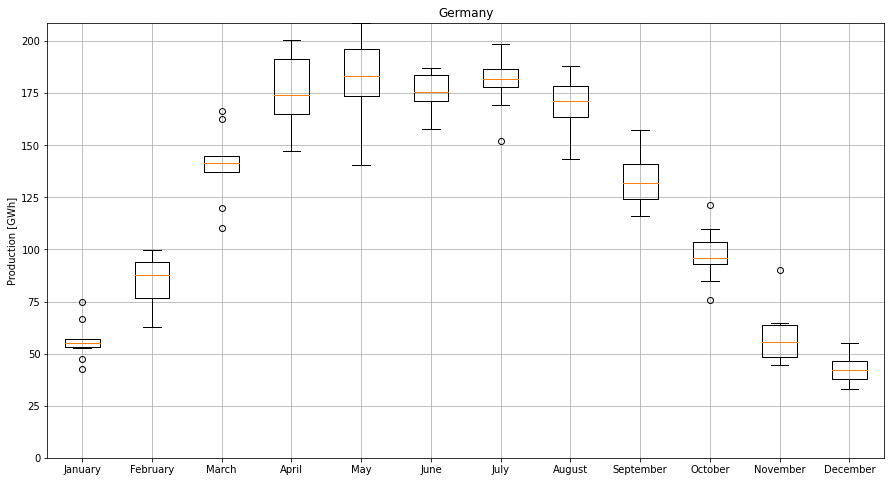

In [16]:
graficas_bienestar('Germany')

In [3]:
ventas_spain()

,Precios (Euros/MWh),Produccion [GWh],Ventas (Euros)
January,€48.21,118.824411,"€5,728,524.85"
February,€42.61,134.036667,"€5,711,302.37"
March,€35.03,180.477737,"€6,322,135.14"
April,€27.38,192.118765,"€5,260,211.78"
May,€28.98,208.482249,"€6,041,815.57"
June,€37.54,207.848842,"€7,802,645.52"
July,€41.10,220.886161,"€9,078,421.20"
August,€43.12,212.815911,"€9,176,622.10"
September,€49.30,181.239021,"€8,935,083.73"
October,€44.63,157.986702,"€7,050,946.52"


In [38]:
def solar_one_day(country,year,month,day):
    cadmio = atlite.solarpanels.CSi
    os.chdir('/home/roberto/Documents/Titulación/Archivos')
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    countries = [country]
    shapes = world[world.name.isin(countries)].set_index('name')
    bounds = shapes.unary_union.buffer(1).bounds
    name = country+'('+str(year)+' - ' +str(month)+' - '+str(day)+").nc"
    cutout = atlite.Cutout(name, module='era5', bounds=bounds, time=slice(str(year)+'-01-01',str(year)+'-01-01'))
    CORINE = 'corine.tif'
    excluder = ExclusionContainer()
    incluir = dump
    excluder.add_raster(CORINE, codes=incluir,invert=True)
    pais = shapes.loc[[country]].geometry.to_crs(excluder.crs)
    masked, transform = shape_availability(pais, excluder)
    eligible_share = masked.sum() * excluder.res**2 / pais.geometry.item().area
    A = cutout.availabilitymatrix(shapes, excluder)
    cap_per_sqkm = 1.7
    area = cutout.grid.set_index(['y', 'x']).to_crs(3035).area / 1e6
    area = xr.DataArray(area, dims=('spatial'))
    capacity_matrix = A.stack(spatial=['y', 'x']) * area * cap_per_sqkm
    cutout.prepare()
    pv = cutout.pv(matrix=capacity_matrix, panel=cadmio, 
                orientation='latitude_optimal', index=shapes.index)
    df = pv.to_pandas()
    df.rename(columns={country:country+'[MWh]'},inplace=True)
    return(df)

In [40]:
solar_one_day('Switzerland',1997,8,12)

2022-08-11 18:35:45,909 INFO Building new cutout Switzerland(1997 - 8 - 12).nc
Compute availability matrix: 100%|██████████| 1/1 [00:00<00:00,  1.91 gridcells/s]
2022-08-11 18:35:47,000 INFO Storing temporary files in /tmp/tmpw7ztm1eb
2022-08-11 18:35:47,006 INFO Calculating and writing with module era5:
2022-08-11 18:35:47,013 INFO Requesting data for feature temperature...
2022-08-11 18:35:47,017 INFO Requesting data for feature height...
2022-08-11 18:35:47,022 INFO Requesting data for feature wind...
2022-08-11 18:35:47,025 INFO Requesting data for feature influx...
2022-08-11 18:35:47,030 INFO Requesting data for feature runoff...
2022-08-11 18:35:48,745 INFO CDS: Downloading variables
	 * geopotential (1997)

2022-08-11 18:35:50,586 INFO CDS: Downloading variables
	 * runoff (1997)

2022-08-11 18:35:53,289 INFO CDS: Downloading variables
	 * surface_net_solar_radiation (1997)
	 * surface_solar_radiation_downwards (1997)
	 * toa_incident_solar_radiation (1997)
	 * total_sky_direct

[########################################] | 100% Completed |  0.1s


2022-08-11 18:35:57,575 INFO Convert and aggregate 'pv'.


name,Switzerland[MWh]
time,
1997-01-01 00:00:00,0.000000
1997-01-01 01:00:00,0.000000
1997-01-01 02:00:00,0.000000
1997-01-01 03:00:00,0.000000
1997-01-01 04:00:00,0.000000
1997-01-01 05:00:00,0.000000
1997-01-01 06:00:00,0.000000
1997-01-01 07:00:00,0.000000
1997-01-01 08:00:00,0.610301
